In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = 'RegresiUTSTelkom.csv'

try:
  df = pd.read_csv(file_path, delimiter = ',')
  print("File loaded successfully!")
  print(df.head())
except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except pd.errors.ParserError:
  print(f"Error: Could not parse the CSV file at {file_path}. Check the file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

File loaded successfully!
   2001  49.94357  21.47114   73.0775   8.74861  -17.40628  -13.09905  \
0  2001  48.73215  18.42930  70.32679  12.94636  -10.32437  -24.83777   
1  2001  50.95714  31.85602  55.81851  13.41693   -6.57898  -18.54940   
2  2001  48.24750  -1.89837  36.29772   2.58776    0.97170  -26.21683   
3  2001  50.97020  42.20998  67.09964   8.46791  -15.85279  -16.81409   
4  2001  50.54767   0.31568  92.35066  22.38696  -25.51870  -19.04928   

   -25.01202  -12.23257   7.83089  ...   13.0162  -54.40548  58.99367  \
0    8.76630   -0.92019  18.76548  ...   5.66812  -19.68073  33.04964   
1   -3.27872   -2.35035  16.07017  ...   3.03800   26.05866 -50.92779   
2    5.05097  -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705   
3  -12.48207   -9.37636  12.63699  ...   9.92661  -55.95724  64.92712   
4   20.67345   -5.19943   3.63566  ...   6.59753  -50.69577  26.02574   

   15.37344   1.11144  -23.08793   68.40795  -1.82223  -27.46348   2.26327  
0  42.87836  -9.903

In [3]:
# Cek apakah ada nilai yang hilang
missing_values = df.isnull().sum()

# Tampilkan jumlah nilai yang hilang untuk setiap kolom
print("Missing Values per Column:")
print(missing_values)


Missing Values per Column:
2001         0
49.94357     0
21.47114     0
73.0775      0
8.74861      0
            ..
-23.08793    0
68.40795     0
-1.82223     0
-27.46348    0
2.26327      0
Length: 91, dtype: int64


Statistik Deskriptif Dataset:
                2001       49.94357       21.47114        73.0775  \
count  515344.000000  515344.000000  515344.000000  515344.000000   
mean     1998.397077      43.387113       1.289515       8.658222   
std        10.931056       6.067557      51.580393      35.268505   
min      1922.000000       1.749000    -337.092500    -301.005060   
25%      1994.000000      39.954667     -26.059848     -11.462775   
50%      2002.000000      44.258490       8.417725      10.476235   
75%      2006.000000      47.833875      36.124030      29.764685   
max      2011.000000      61.970140     384.065730     322.851430   

             8.74861      -17.40628      -13.09905      -25.01202  \
count  515344.000000  515344.000000  515344.000000  515344.000000   
mean        1.164110      -6.553580      -9.521968      -2.391046   
std        16.322802      22.860803      12.857763      14.571853   
min      -154.183580    -181.953370     -81.794290    -188.214000   
25%

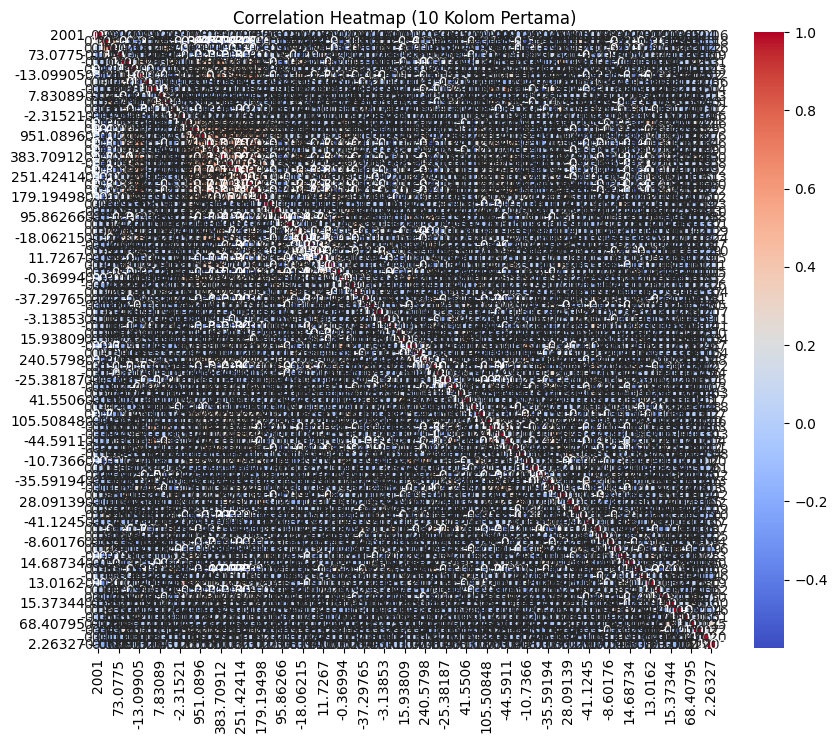

In [4]:
# Statistik deskriptif seluruh dataset
print("Statistik Deskriptif Dataset:")
print(df.describe())

# Analisis korelasi untuk seluruh data
corr_matrix = df.corr()
print("Correlation Matrix:")
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (10 Kolom Pertama)")
plt.show()


Correlation Matrix (10 Kolom Pertama):
               2001  49.94357  21.47114   73.0775   8.74861  -17.40628  \
2001       1.000000  0.225373  0.021402 -0.139542 -0.003286   0.019338   
49.94357   0.225373  1.000000  0.561747  0.245412  0.022269  -0.283635   
21.47114   0.021402  0.561747  1.000000  0.018478  0.126845  -0.184864   
73.0775   -0.139542  0.245412  0.018478  1.000000  0.152487  -0.131739   
8.74861   -0.003286  0.022269  0.126845  0.152487  1.000000   0.034988   
-17.40628  0.019338 -0.283635 -0.184864 -0.131739  0.034988   1.000000   
-13.09905 -0.187443 -0.267820 -0.112388  0.040810  0.321159   0.015561   
-25.01202  0.110461  0.170663  0.115470 -0.057637  0.282165  -0.103112   
-12.23257 -0.034976 -0.057819  0.108089  0.080886  0.031650  -0.013267   
7.83089   -0.024796  0.218736  0.126086  0.043883 -0.037906  -0.217551   

           -13.09905  -25.01202  -12.23257   7.83089  
2001       -0.187443   0.110461  -0.034976 -0.024796  
49.94357   -0.267820   0.170663  -0.

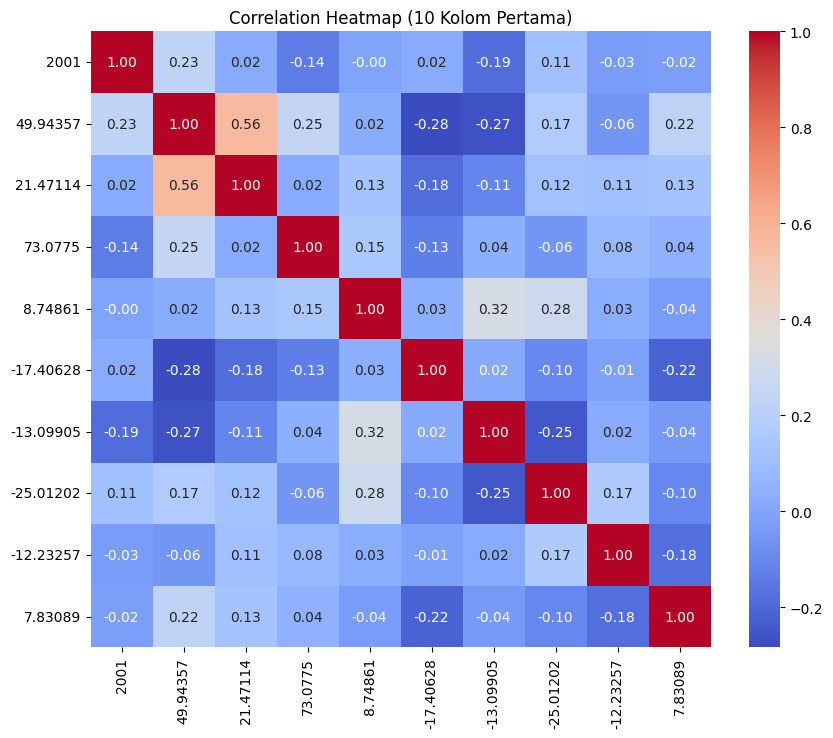

In [5]:
# Analisis korelasi untuk 10 kolom pertama
corr_matrix = df.iloc[:, :10].corr()
print("Correlation Matrix (10 Kolom Pertama):")
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (10 Kolom Pertama)")
plt.show()

In [6]:
#set dataset to 5000
df = df.head(10000)

In [7]:
# Pisahkan fitur (X) dan target (y)
X = df.iloc[:, :-1]  # Semua kolom kecuali kolom terakhir
y = df.iloc[:, -1]  # Kolom terakhir sebagai target

# Cek distribusi target untuk memahami outlier
print("Statistik Target (y):")
print(y.describe())

# Pisahkan data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Statistik Target (y):
count    10000.000000
mean         1.494207
std         22.418310
min       -177.403100
25%         -8.738655
50%          0.036910
75%          9.940775
max        274.984190
Name: 2.26327, dtype: float64


In [8]:
# Definisikan pipeline untuk model
pipelines = {
    "Polynomial Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("regressor", LinearRegression())
    ]),
    "Decision Tree": Pipeline([
        ("scaler", StandardScaler()),
        ("regressor", DecisionTreeRegressor(random_state=42))
    ]),
    "k-NN": Pipeline([
        ("scaler", StandardScaler()),
        ("regressor", KNeighborsRegressor())
    ]),
    "XGBoost": Pipeline([
        ("scaler", StandardScaler()),
        ("regressor", GradientBoostingRegressor(random_state=42))
    ])
}

# Fit model dan tampilkan skor training
training_scores = {}
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    training_scores[name] = pipeline.score(X_train, y_train)

print("Training Scores:")
print(training_scores)


Training Scores:
{'Polynomial Regression': 0.4045967172649969, 'Decision Tree': 1.0, 'k-NN': 0.5926932160746774, 'XGBoost': 0.7651294535457218}


In [9]:
# Definisikan grid untuk setiap model
param_grids = {
    "Decision Tree": {
        "regressor__max_depth": [3, 5, 10, None],
        "regressor__min_samples_split": [2, 5, 10],
        "regressor__min_samples_leaf": [1, 2, 4]
    },
    "k-NN": {
        "regressor__n_neighbors": [3, 5, 7, 10],
        "regressor__weights": ["uniform", "distance"],
        "regressor__metric": ["euclidean", "manhattan"]
    },
    "XGBoost": {
        "regressor__n_estimators": [50, 100, 150],
        "regressor__learning_rate": [0.01, 0.1, 0.2],
        "regressor__max_depth": [3, 5, 10]
    }
}

# Hyperparameter tuning menggunakan GridSearchCV
best_params = {}
for name, param_grid in param_grids.items():
    grid_search = GridSearchCV(pipelines[name], param_grid, cv=2, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params[name] = grid_search.best_params_

print("Best Parameters for Each Model:")
print(best_params)


Best Parameters for Each Model:
{'Decision Tree': {'regressor__max_depth': 5, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10}, 'k-NN': {'regressor__metric': 'euclidean', 'regressor__n_neighbors': 5, 'regressor__weights': 'distance'}, 'XGBoost': {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 150}}


In [10]:
# Evaluasi skor di testing set untuk model terbaik
final_scores = {}
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    final_scores[name] = pipeline.score(X_test, y_test)

print("Final Testing Scores:")
print(final_scores)


Final Testing Scores:
{'Polynomial Regression': 0.3800907152066426, 'Decision Tree': 0.04912728644118003, 'k-NN': 0.3689326298201323, 'XGBoost': 0.6297824918316022}
